In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import pickle
from sklearn.metrics import plot_confusion_matrix
from builtins import range
from builtins import object
from resizeimage import resizeimage
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
FILE_NAME = "train.csv"
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]
IMAGES_FOR_TESTING = "data/Images_for_testing/"

In [4]:
data_path = ["data"] # Insert data file path
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv(file_path)
data = data.drop(index=WHITE_IMAGES, axis=0)
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust

In [5]:
def loadModels():
    modelname1 = 'rosParams_hinge,elasticnet,False,True,False,True'
    loaded_model1 = pickle.load(open(modelname1, 'rb'))
    
    modelname2 = 'rosParams_hinge,elasticnet,True,True,False,True'
    loaded_model2 = pickle.load(open(modelname2, 'rb'))
    
    modelname3 = 'rosParams_hinge,l2,False,True,False,True'
    loaded_model3 = pickle.load(open(modelname3, 'rb'))
    
    modelname4 = 'rosParams_hinge,l2,True,True,False,True'
    loaded_model4 = pickle.load(open(modelname4, 'rb'))
    
    modelname5 = 'rosParams_log,elasticnet,False,True,False,True'
    loaded_model5 = pickle.load(open(modelname5, 'rb'))
    
    return(loaded_model1, loaded_model2, loaded_model3, loaded_model4, loaded_model5)

In [6]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data[" pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [7]:
def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [8]:
X,y = data_X_y(data_exclude_disgust)
X = reshape_X(X)


KeyError: ' pixels'

(SGDClassifier(loss='log', penalty='l1', warm_start=True),
 SGDClassifier(loss='log', warm_start=True),
 SGDClassifier(fit_intercept=False, penalty='elasticnet'),
 SGDClassifier(fit_intercept=False, loss='log', penalty='elasticnet',
               warm_start=True),
 SGDClassifier(fit_intercept=False, loss='log', penalty='l1', warm_start=True))

Accuracy is:  41.03


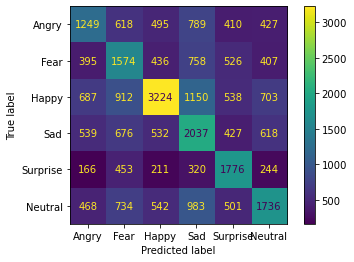

In [23]:
modelname = '39.74%_Smote_SGD'

loaded_model = pickle.load(open(modelname, 'rb'))
y_pred = loaded_model.predict(X)

score = accuracy_score(y, y_pred)
score = score*100
score = str(round(score, 2)) 

print("Accuracy is: ", score)

plot_confusion_matrix(loaded_model, X, y, display_labels = CLASS_NAMES_WITHOUT_DISGUST)

In [9]:
# pip install python-resize-image

def import_test_sample(test_path):
    with open(test_path, 'r+b') as f:
        with Image.open(f) as image:
            test_image = resizeimage.resize_cover(image, [48,48])
    test_image = ImageOps.grayscale(test_image)
    test_image = np.array(test_image)
    test_image = test_image.astype("int32")
    test_image = test_image/255.0
    test_image = test_image.reshape(48, 48, 1)
    plt.imshow(test_image)
    print(test_image.shape)
    
    return test_image

In [12]:
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
def testImages(imageName):
#     modelname1 = '39.74%_Smote_SGD'
#     loaded_model1 = pickle.load(open(modelname1, 'rb'))
    
#     modelname2 = '39.72%_Ros_SGD'
#     loaded_model2 = pickle.load(open(modelname2, 'rb'))
    
#     modelname3 = '39.48%_Smote_SGD'
#     loaded_model3 = pickle.load(open(modelname3, 'rb'))
    
#     modelname4 = '39.1%_Smote_SGD'
#     loaded_model4 = pickle.load(open(modelname4, 'rb'))
    
#     modelname5 = '38.79%_Smote_SGD'
#     loaded_model5 = pickle.load(open(modelname5, 'rb'))


    modelname1 = 'rosParams_hinge,elasticnet,False,True,False,True'
    loaded_model1 = pickle.load(open(modelname1, 'rb'))
    
    modelname2 = 'rosParams_hinge,elasticnet,True,True,False,True'
    loaded_model2 = pickle.load(open(modelname2, 'rb'))
    
    modelname3 = 'rosParams_hinge,l2,False,True,False,True'
    loaded_model3 = pickle.load(open(modelname3, 'rb'))
    
    modelname4 = 'rosParams_hinge,l2,True,True,False,True'
    loaded_model4 = pickle.load(open(modelname4, 'rb'))
    
    modelname5 = 'rosParams_log,elasticnet,False,True,False,True'
    loaded_model5 = pickle.load(open(modelname5, 'rb'))
    
    test_image = import_test_sample(IMAGES_FOR_TESTING + imageName)
    
    y_pred1 = loaded_model1.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred1[0]])
    
    y_pred2 = loaded_model2.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred2[0]])
    
    y_pred3 = loaded_model3.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred3[0]])
    
    y_pred4 = loaded_model4.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred4[0]])
    
    y_pred5 = loaded_model5.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred5[0]])


Testing angry..
(48, 48, 1)
Surprise
Sad
Sad
Surprise
Sad


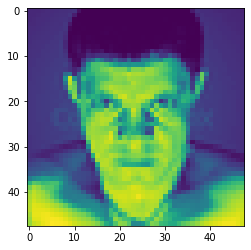

In [13]:
print("Testing angry..")
testImages("angry1.jpg")

Testing angry..
(48, 48, 1)
Fear
Sad
Sad
Angry
Sad


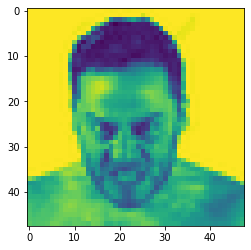

In [14]:
print("Testing angry..")
testImages("angry2.jpg")

Testing fear..
(48, 48, 1)
Fear
Sad
Sad
Happy
Happy


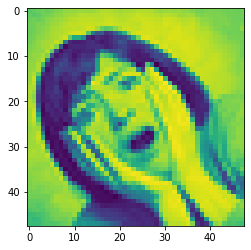

In [15]:
print("Testing fear..")
testImages("fear1.jpg")

Testing fear..
(48, 48, 1)
Fear
Angry
Sad
Fear
Surprise


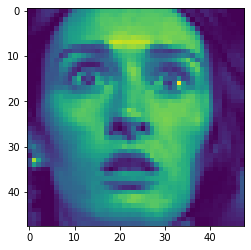

In [16]:
print("Testing fear..")
testImages("fear2.jpg")

Testing happy..
(48, 48, 1)
Fear
Sad
Sad
Fear
Sad


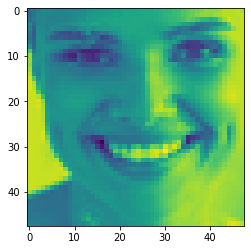

In [17]:
print("Testing happy..")
testImages("happy1.jpg")

Testing happy..
(48, 48, 1)
Fear
Surprise
Sad
Fear
Sad


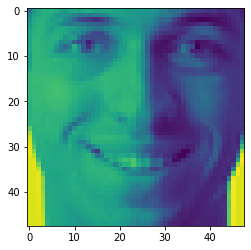

In [18]:
print("Testing happy..")
testImages("happy2.jpg")

Testing sad..
(48, 48, 1)
Fear
Sad
Fear
Fear
Fear


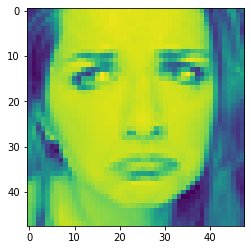

In [19]:
print("Testing sad..")
testImages("sad1.jpg")

Testing sad..
(48, 48, 1)
Fear
Sad
Sad
Fear
Sad


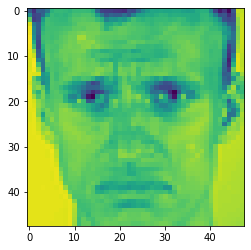

In [20]:
print("Testing sad..")
testImages("sad2.jpg")

Testing suprise..
(48, 48, 1)
Fear
Surprise
Sad
Fear
Surprise


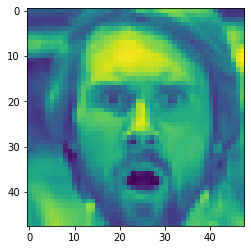

In [21]:
print("Testing suprise..")
testImages("suprise1.jpg")

Testing suprise..
(48, 48, 1)
Fear
Angry
Fear
Fear
Fear


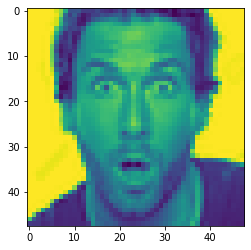

In [22]:
print("Testing suprise..")
testImages("suprise2.jpg")

Testing neutral..
(48, 48, 1)
Fear
Angry
Fear
Fear
Fear


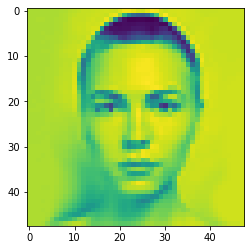

In [23]:
print("Testing neutral..")
testImages("neutral1.jpg")

Testing neutral..
(48, 48, 1)
Fear
Surprise
Fear
Fear
Fear


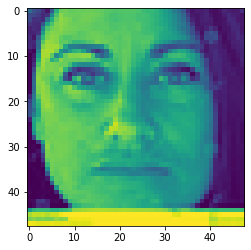

In [24]:
print("Testing neutral..")
testImages("neutral2.jpg")

In [25]:
file_path = os.sep.join(data_path + ['icml_face_data.csv'])
data_test = pd.read_csv(file_path)
test = ["PrivateTest", "PublicTest"]
data_test = data_test[data_test[' Usage'].isin(test) ]

# If icml_face_data.csv is used
data_test.drop(' Usage', axis=1, inplace=True)

data_test.head()

,emotion,pixels
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [26]:
data_test = data_test[data_test['emotion'] != 1] # Drops the emotion Disgust
data_test = data_test.replace({
2 : 1,
3 : 2,
4 : 3,
5 : 4,
6 : 5
})
data_test.shape, data_test.emotion.unique()

((7067, 2), array([0, 3, 5, 2, 1, 4], dtype=int64))

In [27]:
X_test, y_test = data_X_y(data_test)
print(X_test.shape)
X_test = reshape_X(X_test)
print(X_test.shape)

(7067, 48, 48, 1)
(7067, 2304)


In [29]:
modelname = 'rosParams_hinge,elasticnet,False,True,False,True'

loaded_model = pickle.load(open(modelname, 'rb'))
y_pred = loaded_model.predict(X_test)

score = accuracy_score(y_test, y_pred)
score = score*100
score = str(round(score, 2)) 

print("Accuracy is: ", score)

plot_confusion_matrix(loaded_model, X, y, display_labels = CLASS_NAMES_WITHOUT_DISGUST)

Accuracy is:  26.16


NameError: name 'X' is not defined

In [66]:
def testNewModels(testImage, emotion):
    modelnames = ['rosParams_hinge,elasticnet,False,True,False,True', 'rosParams_hinge,elasticnet,True,True,False,True', 'rosParams_hinge,l2,False,True,False,True', 'rosParams_hinge,l2,True,True,False,True', 'rosParams_log,elasticnet,False,True,False,True', 'rosParams_log,elasticnet,True,True,False,False', 'rosParams_log,elasticnet,True,True,False,True', 'rosParams_log,l1,True,False,False,False', 'rosParams_log,l1,True,False,False,True', 'rosParams_log,l2,False,True,False,False', 'rosParams_log,l2,True,True,False,True', 'rosParams_modified_huber,l1,True,True,False,True']
    results = []
    
    for i in modelnames:
        loaded_model = pickle.load(open(i, 'rb'))
        test_image = import_test_sample(IMAGES_FOR_TESTING + testImage)
        y_pred = loaded_model.predict(np.reshape(test_image, (1, 2304)))
        
        result = CLASS_NAMES_WITHOUT_DISGUST[y_pred[0]]

        results.append(str(result))
    print("Testing",emotion,'...')
    print(results)
        

(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
Testing happy ...
['Happy', 'Surprise', 'Surprise', 'Happy', 'Surprise', 'Surprise', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Surprise']
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
Testing fear ...
['Happy', 'Surprise', 'Surprise', 'Sad', 'Sad', 'Surprise', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Surprise']
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
Testing angry ...
['Neutral', 'Surprise', 'Surprise', 'Neutral', 'Surprise', 'Neutral', 'Neutral', 'Sad', 'Sad', 'Happy', 'Neutral', 'Surprise']
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
(48, 48, 1)
Testing sad ...
[

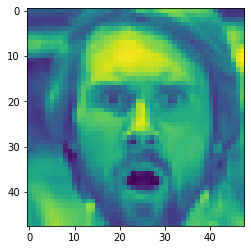

In [67]:
testNewModels("happy1.jpg", 'happy')
testNewModels("fear1.jpg", 'fear')
testNewModels("angry1.jpg", 'angry')
testNewModels("sad1.jpg", 'sad')
testNewModels("neutral1.jpg", 'neutral')
testNewModels("suprise1.jpg", 'suprise')